In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/rickroma/Desktop/Hoboken_restaurants_reviews.csv")

In [2]:
df.head()

,Unnamed: 0,Unnamed: 0.1,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,0,0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5.0 star rating,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
1,1,1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4.0 star rating,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
2,2,2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5.0 star rating,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
3,3,3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4.0 star rating,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
4,4,4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5.0 star rating,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"


In [3]:
df.count()

Unnamed: 0           74611
Unnamed: 0.1         74611
user_id              74611
user_name            74611
user_rating          74611
user_text            74611
restaurant_name      74611
restaurant_rating    74611
restaurant_price     74479
restaurant_type      74611
dtype: int64

In [4]:
df['restaurant_rating'].head()

0    4.0 star rating
1    4.0 star rating
2    4.0 star rating
3    4.0 star rating
4    4.0 star rating
Name: restaurant_rating, dtype: object

In [5]:
df['rating'] = df['restaurant_rating'].str[:3]
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'].head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: rating, dtype: float64

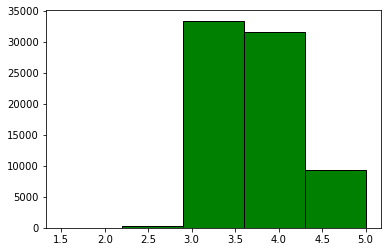

In [6]:
x = df['rating']
plt.hist(x,bins=5,color = 'green',edgecolor='black')
plt.show()

In [7]:
df.dropna(inplace=True)
df[df['rating'] != 3]
df['good'] = np.where(df['rating'] > 3, 1, 0)
df.head(25)

,Unnamed: 0,Unnamed: 0.1,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type,rating,good
0,0,0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5.0 star rating,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1
1,1,1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4.0 star rating,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1
2,2,2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5.0 star rating,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1
3,3,3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4.0 star rating,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1
4,4,4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5.0 star rating,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1
5,5,5,a5KJFFLBMoEpU7Bogn8YdQ,Nicole C.,4.0 star rating,beautifully decorated wine bar with delicious ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1
6,6,6,VG-EfMnPKHKHhEQZIWv1zQ,Kelly V.,3.0 star rating,"We were there today, for brunch. Very disappoi...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1
7,7,7,y_LETSyVwMVKbMSHwHDioQ,Erin A.,3.0 star rating,"I am feeling more 3 and 1/2 stars here, so let...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1
8,8,8,zbvdkxh9OWQtk8jQB1_4BA,Natasha D.,3.0 star rating,Ambience is nice but the dinner menu is limite...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1
9,9,9,ZZELut-m0rSyivf8saCMKA,Mark S.,4.0 star rating,It certainly wasn't easy...When the better hal...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",4.0,1


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['user_text'], df['good'], random_state = 0)
print(X_train.head(10))
print(X_train.shape)

69316    As Hoboken residents, we used to be long time ...
47310    This place is 100% about the scene, which is p...
71035    Good and authentic food.The best is to order t...
62029    I loved the fusion! This was my first experien...
32863    I love this place, I love the environment and ...
49795    Wonder if any of the celebrities plastered on ...
53050    Came here for the churro waffle. It was very s...
1798     This place started out great but recently it's...
47970    This was my first encounter inside the actual ...
31889    I went here on Saturday night for my birthday ...
Name: user_text, dtype: object
(55859,)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
vect.get_feature_names()[::1000]

['00',
 '50ish',
 'adorably',
 'angling',
 'attained',
 'bavarian',
 'blergh',
 'brocc',
 'cannellini',
 'checknon',
 'clothing',
 'continue',
 'crustinis',
 'deliciousssssssss',
 'disorderly',
 'durian',
 'eo',
 'fam',
 'flipflops',
 'fry',
 'gnawed',
 'guiness',
 'hiawatha',
 'ice',
 'internet',
 'kababs',
 'lavazza',
 'loscharritos',
 'maryi',
 'minerality',
 'murmurs',
 'nopal',
 'optimistic',
 'pappardelle',
 'phonetically',
 'portuguese',
 'pulav',
 'recommendmy',
 'reviewnot',
 'salamis',
 'seed',
 'side',
 'soho',
 'staffers',
 'sucker',
 'tartar',
 'tiffany',
 'truffe',
 'unpublished',
 'vom',
 'wildly',
 'yummylamb']

In [11]:
len(vect.get_feature_names())

51237

In [12]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<55859x51237 sparse matrix of type '<class 'numpy.int64'>'
	with 4139507 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

In [ ]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:20]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-21:-1]]))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

In [ ]:
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

In [ ]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:20]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-21:-1]]))

In [ ]:
#print(model.predict(vect.transform(['Took a while since it shipped from China. It was worth the wait. Great little flashlight at a great price. Runs on 1 AA battery and puts out a lot of light.',"""Stopped working just after return period. Save your money.""","""I received the product 2 weeks after ordering. There wasn't any documentation for it, but it's a put the battery in and push the button product. The zoom feature is quite bright. It makes a square with grid lines caused by the magnification of the led. Get past that, and it's functional. I tested the lumens against my 300lm streamlight, and it's very close, 225-275lm. I will be purchasing more as the flood focus is just as functional. Great product.""","""Terrible. Did not light up consistently while pushing the button. Both flashlights had the same issue as they would eventually turn on after pushing the button repeatedly (5 or 6 times). These are junk."""])))

In [ ]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

In [ ]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:20]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-21:-1]))

In [ ]:
#print(model.predict(vect.transform(['Took a while since it shipped from China. It was worth the wait. Great little flashlight at a great price. Runs on 1 AA battery and puts out a lot of light.',"""Stopped working just after return period. Save your money.""","""I received the product 2 weeks after ordering. There wasn't any documentation for it, but it's a put the battery in and push the button product. The zoom feature is quite bright. It makes a square with grid lines caused by the magnification of the led. Get past that, and it's functional. I tested the lumens against my 300lm streamlight, and it's very close, 225-275lm. I will be purchasing more as the flood focus is just as functional. Great product.""","""Terrible. Did not light up consistently while pushing the button. Both flashlights had the same issue as they would eventually turn on after pushing the button repeatedly (5 or 6 times). These are junk."""])))